In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm  # Import tqdm for the progress bar
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

import src.util as utils
import importlib
importlib.reload(utils)

<module 'src.util' from 'c:\\Users\\marwi\\OneDrive - Universität Potsdam\\Intro_to_ML\\Assignment 02\\uib-machine-learning\\assignment-2\\src\\util.py'>

In [2]:
X = np.load("./data/emnist_hex_images.npy")
y = np.load("./data/emnist_hex_labels.npy")

In [3]:
# Inspection of Label Occurences for Dataset inspection
unique_values, counts = np.unique(y, return_counts=True)
expected_occurence =  y.size / counts.size 
print('Expected average occurence of one symbol: ' + str(int(expected_occurence)) + " | in %: " + str("{:.1%}".format(float(expected_occurence / y.size))))
# Print the results
for value, count in zip(unique_values, counts):
    if value < 10:
        percentage_occurence = "{:.1%}".format(float(count / y.size))
        print(f"{value} occurs {count} times" + " | Average: " + percentage_occurence)
    elif (value >= 10) & (value < 16):
        percentage_occurence = "{:.1%}".format(float(count / y.size))
        char_value = chr(ord('a') + value - 10)  # Convert value to corresponding ASCII character
        print(f"{char_value} occurs {count} times" " | Average: " + percentage_occurence)
    else:
        print("Empty occurs " + str(count) + " times" + " | Average: " + percentage_occurence)

Expected average occurence of one symbol: 6341 | in %: 5.9%
0 occurs 7407 times | Average: 6.9%
1 occurs 7642 times | Average: 7.1%
2 occurs 7371 times | Average: 6.8%
3 occurs 7397 times | Average: 6.9%
4 occurs 7397 times | Average: 6.9%
5 occurs 7220 times | Average: 6.7%
6 occurs 7382 times | Average: 6.8%
7 occurs 7451 times | Average: 6.9%
8 occurs 7327 times | Average: 6.8%
9 occurs 7374 times | Average: 6.8%
a occurs 6022 times | Average: 5.6%
b occurs 3878 times | Average: 3.6%
c occurs 6198 times | Average: 5.7%
d occurs 4562 times | Average: 4.2%
e occurs 1337 times | Average: 1.2%
f occurs 6159 times | Average: 5.7%
Empty occurs 5678 times | Average: 5.7%


In [4]:
# Define the desired maximum instances per class
max_instances_per_class = 1000

# Initialize lists to store downsampled data
downsampled_X = []
downsampled_y = []
# Iterate through unique classes
unique_classes = np.unique(y)
for class_label in unique_classes:
    # Get indices of instances for this class
    class_indices = np.where(y == class_label)[0]

    # Randomly select up to max_instances_per_class instances for this class
    if len(class_indices) > max_instances_per_class:
        selected_indices = np.random.choice(class_indices, max_instances_per_class, replace=False)
    else:
        selected_indices = class_indices

    # Append the selected instances to the downsampled data
    downsampled_X.extend(X[selected_indices])
    downsampled_y.extend(y[selected_indices])

# Convert the downsampled data to NumPy arrays
downsampled_X = np.array(downsampled_X)
downsampled_y = np.array(downsampled_y)

# Shuffle the downsampled data
shuffle_indices = np.random.permutation(len(downsampled_X))
downsampled_X = downsampled_X[shuffle_indices]
downsampled_y = downsampled_y[shuffle_indices]

# Print the counts for each class in the downsampled dataset
unique_classes_downsampled, class_counts_downsampled = np.unique(downsampled_y, return_counts=True)
#for class_label, class_count in zip(unique_classes_downsampled, class_counts_downsampled):
   # print(f"Class {class_label}: {class_count} instances in the downsampled dataset.")

In [5]:
# Sample a smaller portion of the data (e.g., 10,000 samples)
# Ideal sample size Sample linear model -> sample_size = 8700 -> 88,5%
# Ideal sample size Sample linear model (balanced data set) -> sample_size = 1000 -> 84-87%
sample_size = 10000
X_sampled, _, y_sampled, _ = train_test_split(downsampled_X, downsampled_y, train_size=sample_size, stratify=downsampled_y, random_state=42)

# Preprocessing step: Flattening of images to a 1D Array
X_flattened = X_sampled.reshape(X_sampled.shape[0], -1)

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_flattened, y_sampled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train SVM model using training and validation data
# model_SVM = SVC(kernel='linear') #-> > 87% validation accuracy
model_SVM = SVC(kernel='poly', degree=3, gamma='auto', coef0=0.0) #-> poly leader with always over 90% validation accuracy
#model_SVM = SVC(kernel='rbf', gamma=0.1) -> just over 5% validation accuracy -> discard
#model_SVM = SVC(kernel='rbf', gamma=0.01) -> just over 5% validation accuracy -> discard
#model_SVM = SVC(kernel='rbf', gamma=1.0) -> just over 5% validation accuracy -> discard
#model_SVM = SVC(kernel='rbf', gamma=0.001) -> just over 5% validation accuracy -> discard
#model_SVM = SVC(kernel='rbf', gamma=0.0001) -> just over 5% validation accuracy -> discard
#model_SVM = SVC(kernel='rbf', gamma=0.25) -> just over 5% validation accuracy -> discard
#model_SVM = SVC(kernel='rbf', gamma=0.5) -> just over 5% validation accuracy -> discard
#model_SVM = SVC(kernel='rbf', gamma=0.75) -> just over 5% validation accuracy -> discard

#model_SVM = SVC(kernel='poly', degree=3)  # Polynomial kernel of degree 3 -> leading with ~ accuracy rate of > 91% validation accuracy -> Discard
#model_SVM = SVC(kernel='poly', degree=3, gamma='scale', coef0=0.0) # -> accuracy rate of > 90% validation accuracy -> Discard
#model_SVM = SVC(kernel='poly', degree=4, gamma='scale', coef0=0.0)
#model_SVM = SVC(kernel='poly', degree=2, gamma='scale', coef0=0.0) #-> leading
#model_SVM = SVC(kernel='poly', degree=3, gamma='scale', coef0=1.0)

#model_SVM = SVC(kernel='sigmoid', gamma=0.01, coef0=0.0) -> ~ 5% validation accuracy -> Discard
#model_SVM = SVC(kernel='sigmoid', gamma=0.1, coef0=0.0) -> ~ 5% validation accuracy -> Discard
#model_SVM = SVC(kernel='sigmoid', gamma=1.0, coef0=0.0) -> ~ 5% validation accuracy -> Discard
#model_SVM = SVC(kernel='sigmoid', gamma=0.01, coef0=1.0) -> ~ 5% validation accuracy -> Discard
#model_SVM = SVC(kernel='sigmoid', gamma=0.1, coef0=1.0) -> ~ 5% validation accuracy -> Discard
#model_SVM = SVC(kernel='sigmoid', gamma=0.3, coef0=0.5) -> ~ 5% validation accuracy -> Discard

In [6]:
# Model training
model_SVM.fit(X_train, y_train)

# Predictions on validation data
svm_prediction = model_SVM.predict(X_val)

# Evaluation on validation data
val_accuracy = accuracy_score(y_val, svm_prediction)
val_classification_report = classification_report(y_val, svm_prediction)

# Print validation evaluation results
print("Validation Accuracy: ", val_accuracy)
#print("Validation Classification Report: ")
#print(val_classification_report)


Validation Accuracy:  0.8993333333333333


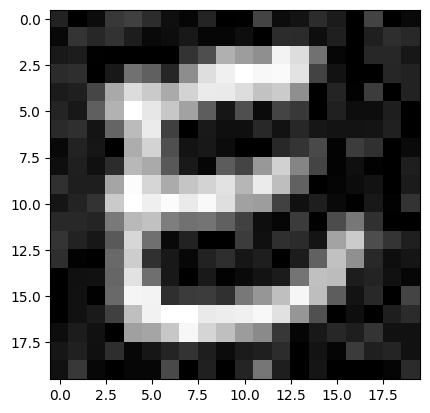

Predicted Class: 14


In [7]:
# Testing functionality with manual testing
# Choose a random index from the validation set
random_index = np.random.randint(0, len(X_val))

# Display the image
plt.imshow(X_val[random_index].reshape(20, 20), vmin=0, vmax=255, cmap="gray")
plt.show()

# Predict the class using the trained model
predicted_class = model_SVM.predict(X_val[random_index].reshape(1, -1))

# Print the predicted class
print("Predicted Class:", predicted_class[0])

# Predictions on validation data
svm_prediction = model_SVM.predict(X_val)

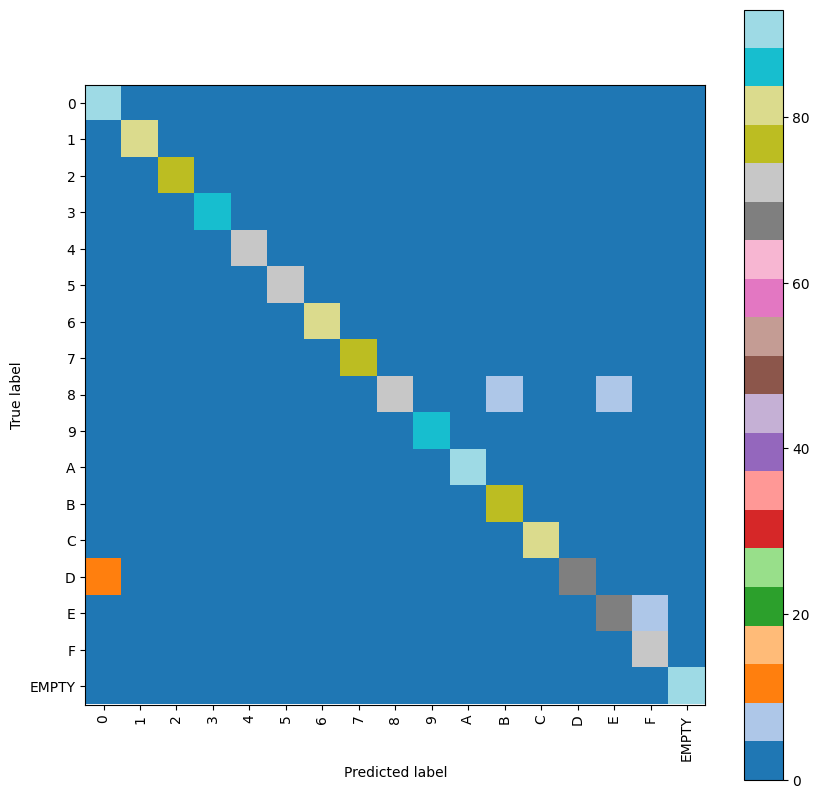

In [8]:
# Creation of a confusion matrix

from src.util import translate_label_to_class
cm = metrics.confusion_matrix(y_val, svm_prediction)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
# Get unique labels from y_val
labels = np.unique(y_val)

# Translate each unique label to its corresponding class
class_labels = [translate_label_to_class(label) for label in labels]
tick_marks = np.arange(len(class_labels))
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.tab20)
plt.colorbar()
_ = plt.xticks(tick_marks, class_labels, rotation=90)
_ = plt.yticks(tick_marks, class_labels)
plt.savefig("confusion_matrix.png", dpi=300)
plt.show()

In [18]:
import os

# List of SVM models to try
svm_models = {
    'Sigmoid_00': SVC(kernel='sigmoid', gamma=0.01, coef0=0.0),
    'Sigmoid_01': SVC(kernel='sigmoid', gamma=0.01, coef0=0.0), 
    'Sigmoid_02': SVC(kernel='sigmoid', gamma=0.1, coef0=0.0), 
    'Sigmoid_03': SVC(kernel='sigmoid', gamma=1.0, coef0=0.0), 
    'Sigmoid_04': SVC(kernel='sigmoid', gamma=0.01, coef0=1.0), 
    'Sigmoid_05': SVC(kernel='sigmoid', gamma=0.1, coef0=1.0),
    'Sigmoid_06': SVC(kernel='sigmoid', gamma=0.3, coef0=0.5), 
    'Linear': SVC(kernel='linear'),
    'RBF_00': SVC(kernel='rbf', gamma=0.1),
    'RBF_01': SVC(kernel='rbf', gamma=0.01),
    'RBF_02': SVC(kernel='rbf', gamma=1.0),
    'RBF_03': SVC(kernel='rbf', gamma=0.001),
    'RBF_04': SVC(kernel='rbf', gamma=0.0001),
    'RBF_05': SVC(kernel='rbf', gamma=0.25),
    'RBF_06': SVC(kernel='rbf', gamma=0.5),
    'RBF_07': SVC(kernel='rbf', gamma=0.75),
    'Poly_00': SVC(kernel='poly', degree=3),
    'Poly_01': SVC(kernel='poly', degree=3, gamma='scale', coef0=0.0),
    'Poly_02': SVC(kernel='poly', degree=4, gamma='scale', coef0=0.0),
    'Poly_03': SVC(kernel='poly', degree=2, gamma='scale', coef0=0.0),
    'Poly_04': SVC(kernel='poly', degree=3, gamma='scale', coef0=1.0)
}

# Create a directory to store confusion matrices
confusion_matrices_dir = 'confusion_matrices'
os.makedirs(confusion_matrices_dir, exist_ok=True)

# Iterate through each SVM model and generate confusion matrix
i = 0
for model_name, model in svm_models.items():
    i = i + 1
    print("Model Nr. " + str(i))
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions on validation data
    svm_prediction = model.predict(X_val)

    # Create a confusion matrix
    cm = metrics.confusion_matrix(y_val, svm_prediction)

    # Plot the confusion matrix
    plt.figure(figsize=(10, 10))
    labels = np.unique(y_val)
    # Translate each unique label to its corresponding class
    class_labels = [translate_label_to_class(label) for label in labels]
    tick_marks = np.arange(len(class_labels))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.tab20)
    plt.colorbar()
    _ = plt.xticks(tick_marks, class_labels, rotation=90)
    _ = plt.yticks(tick_marks, class_labels)
    plt.title(f'Confusion Matrix for {model_name} SVM')
    
    # Save the confusion matrix
    matrix_filename = os.path.join(confusion_matrices_dir, f'confusion_matrix_{model_name}.png')
    plt.savefig(matrix_filename, dpi=300)
    plt.close()

# Display a message indicating successful completion
print('Confusion matrices saved in the directory:', confusion_matrices_dir)

Model Nr. 1
Model Nr. 2
Model Nr. 3
Model Nr. 4
Model Nr. 5
Model Nr. 6
Model Nr. 7
Model Nr. 8
Model Nr. 9
Model Nr. 10
Model Nr. 11
Model Nr. 12
Model Nr. 13
Model Nr. 14
Model Nr. 15
Model Nr. 16
Model Nr. 17
Model Nr. 18
Model Nr. 19
Model Nr. 20
Model Nr. 21
Confusion matrices saved in the directory: confusion_matrices


Random Forest Validation Accuracy:  0.864


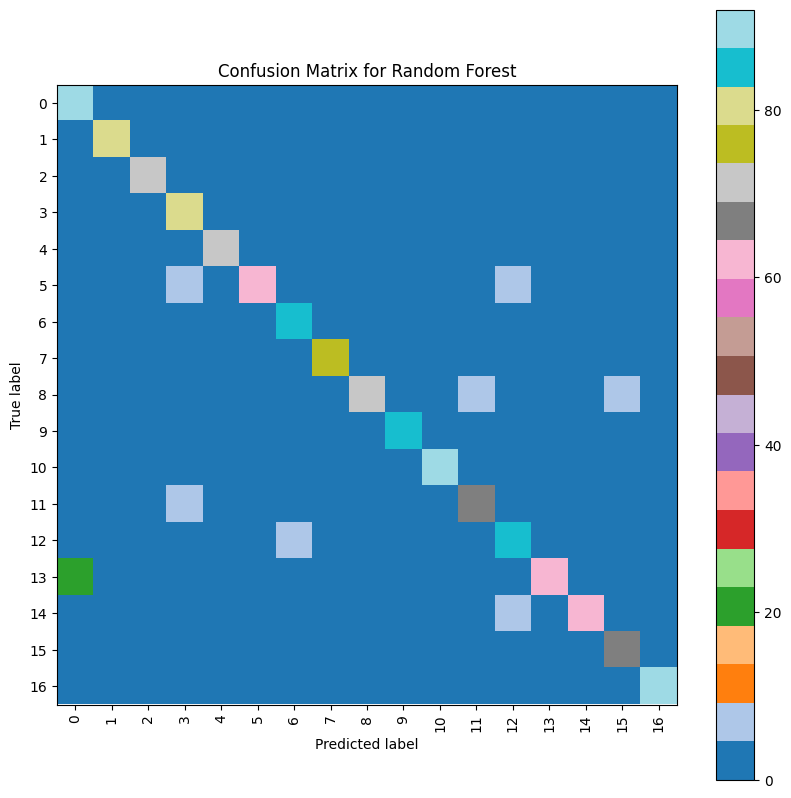

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Create and train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions on validation data
rf_prediction = rf_model.predict(X_val)

# Evaluate the model
rf_val_accuracy = accuracy_score(y_val, rf_prediction)
rf_val_classification_report = classification_report(y_val, rf_prediction)

# Print validation evaluation results for Random Forest
print("Random Forest Validation Accuracy: ", rf_val_accuracy)
#print("Random Forest Validation Classification Report: ")
#print(rf_val_classification_report)

# Create a confusion matrix for Random Forest
rf_cm = metrics.confusion_matrix(y_val, rf_prediction)

# Plot the confusion matrix for Random Forest
plt.figure(figsize=(10, 10))
labels_rf = np.unique(y_val)
tick_marks_rf = np.arange(len(labels_rf))
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.imshow(rf_cm, interpolation='nearest', cmap=plt.cm.tab20)
plt.colorbar()
_ = plt.xticks(tick_marks_rf, labels_rf, rotation=90)
_ = plt.yticks(tick_marks_rf, labels_rf)
plt.title('Confusion Matrix for Random Forest')
plt.savefig("confusion_matrix_rf.png", dpi=300)
plt.show()


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}
# Instamce of Random Forest Model
randomForest_model = RandomForestClassifier()
# Performing a grid search in order to find the best combination of hyperparameters for model outcome
grid_search = GridSearchCV(estimator=randomForest_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)



Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters: {'max_depth': 20, 'n_estimators': 200}
